<a href="https://colab.research.google.com/github/kostas696/My_Latest_Projects/blob/main/Project_Credit_Card_Transactions_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Credit Card Transactions Fraud Detection**

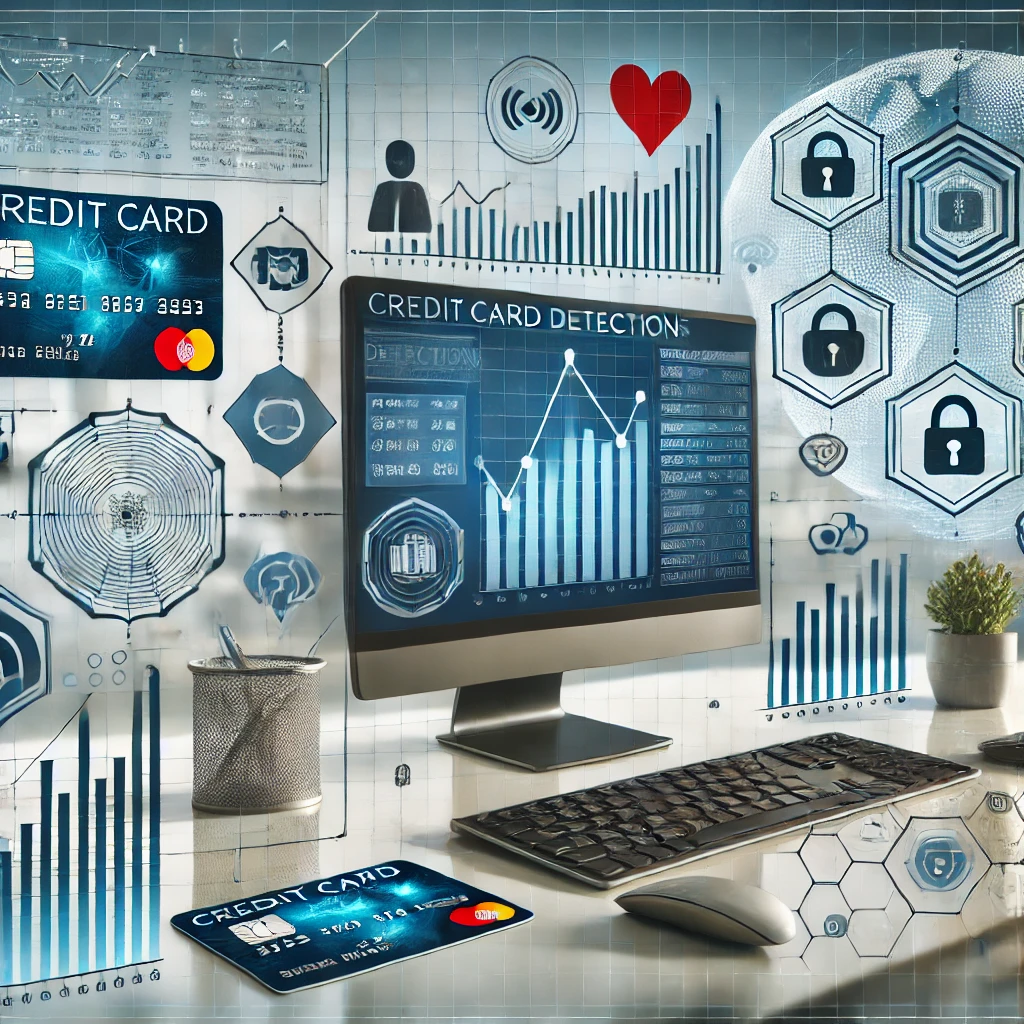

## Introduction

Credit card fraud is a significant issue for financial institutions and consumers. With the increasing volume of transactions and the rise of online shopping, the potential for fraudulent activities has also surged. Identifying fraudulent transactions in real-time is crucial to minimize financial losses and protect consumers. Machine learning techniques have shown promise in detecting patterns indicative of fraud, allowing for timely intervention.

## Objective

The objective of this project is to develop and evaluate machine learning models that can effectively distinguish between fraudulent and legitimate credit card transactions. By leveraging various algorithms, including Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and XGBoost, we aim to identify the most suitable model for fraud detection.

## Dataset Information

The dataset used in this project is a simulated credit card transaction dataset, which includes both legitimate and fraudulent transactions from January 1, 2019, to December 31, 2020. The dataset contains transactions from 1,000 customers with 800 merchants. It is divided into a training set (fraudTrain.csv) and a test set (fraudTest.csv).

Features:

- trans_date_trans_time: Date and time of the transaction.
- cc_num: Credit card number.
- merchant: Merchant name.
- category: Transaction category.
- amt: Transaction amount.
- first, last: Customer first and last names.
- gender: Customer gender.
- street, city, state, zip, lat, long, city_pop, job, dob: Customer demographic and geographic information.
- trans_num: Transaction number.
- unix_time: Unix time of the transaction.
- merch_lat, merch_long: Merchant latitude and longitude.
- is_fraud: Fraud label (1 if the transaction is fraudulent, 0 otherwise).

## Research Question

The primary research question addressed in this project is: "Which machine learning model can most accurately identify fraudulent credit card transactions?"

## Approach of Analysis

**Data Collection and Preprocessing:**

- Import the dataset from Kaggle.
- Perform initial data exploration to understand the structure and identify missing or duplicated values.
- Feature engineering to extract additional relevant features (e.g., transaction hour, day of the week, month, year).

**Exploratory Data Analysis (EDA):**

- Conduct univariate analysis to examine the distribution of individual features.
- Conduct bivariate analysis to explore the relationship between features and the target variable (is_fraud).
- Conduct multivariate analysis to understand interactions between multiple features.

**Data Preparation:**

- One-hot encode categorical variables.
- Scale numerical features to standardize the data.
- Perform SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance in the target variable.

**Model Training and Evaluation:**

- Split the data into training and test sets.
- Train various machine learning models (Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, XGBoost) on the resampled training set.
- Evaluate the models on the test set using classification reports and confusion matrices to assess their performance.

**Result Interpretation:**

- Compare the performance of different models based on precision, recall, and F1-score.
- Discuss the trade-offs between different models and identify the most suitable model for fraud detection based on the business context.

## Imports

In [ ]:
!pip install -q opendatasets

In [ ]:
!pip install imblearn

In [ ]:
!pip install xgboost

In [ ]:
import opendatasets as od

import pandas as pd
import numpy as np
import joblib
from joblib import Parallel, delayed
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Set plotting size and style
sns.set(rc = {'figure.figsize':(16, 8)})
sns.set_style("darkgrid")

## Data Collection and Preprocessing

In [ ]:
# Import our dataset straight from kaggle
od.download('https://www.kaggle.com/datasets/kartik2112/fraud-detection')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kostas696
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection


100%|██████████| 202M/202M [00:01<00:00, 146MB/s]


In [ ]:
# Load and preview our train dataset
fraudTrain_df = pd.read_csv('/content/fraud-detection/fraudTrain.csv')
fraudTrain_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
# Check basic characteristics of the dataset
print ("Rows     : " ,fraudTrain_df.shape[0])
print ("Columns  : " ,fraudTrain_df.shape[1])
print ("\nFeatures : \n" ,fraudTrain_df.columns.tolist())
print ("\nMissing values :  ", fraudTrain_df.isnull().sum().values.sum())
print ("\nUnique values :  \n",fraudTrain_df.nunique())

Rows     :  1296675
Columns  :  23

Features : 
 ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']

Missing values :   0

Unique values :  
 Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
m

In [ ]:
# Check the general information of the train dataset
fraudTrain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
# Check for duplicates
fraudTrain_df.duplicated().sum()

0

In [ ]:
# Descriptive statistics
fraudTrain_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


## Feature Engineering

In [ ]:
# Transform the 'trans_date_trans_time' column into datetime and extract the year, month, day of week and hour
fraudTrain_df['trans_date_trans_time'] = pd.to_datetime(fraudTrain_df['trans_date_trans_time'])
fraudTrain_df['hour'] = fraudTrain_df['trans_date_trans_time'].dt.hour
fraudTrain_df['day_of_week'] = fraudTrain_df['trans_date_trans_time'].dt.dayofweek
fraudTrain_df['month'] = fraudTrain_df['trans_date_trans_time'].dt.month
fraudTrain_df['year'] = fraudTrain_df['trans_date_trans_time'].dt.year

## Exploratory Data Analysis (EDA)

### Univariate Analysis

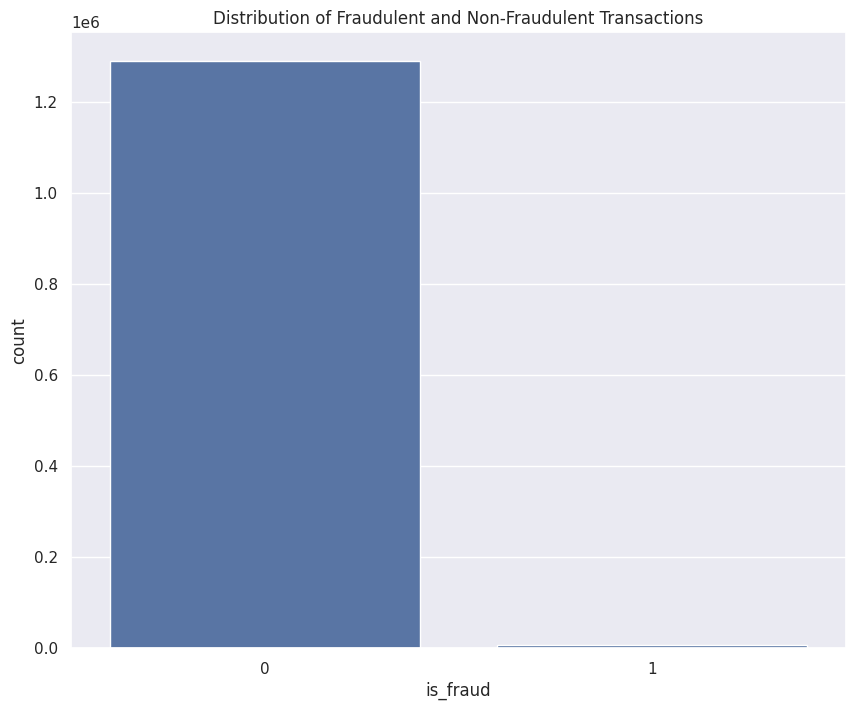

In [ ]:
# Visualizations
plt.figure(figsize=(10, 8))
sns.countplot(x='is_fraud', data=fraudTrain_df)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

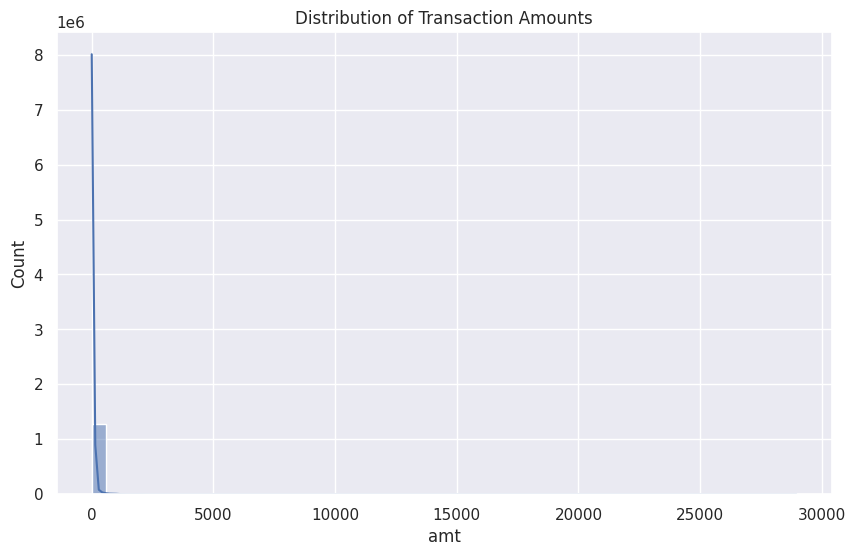

In [ ]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(fraudTrain_df['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

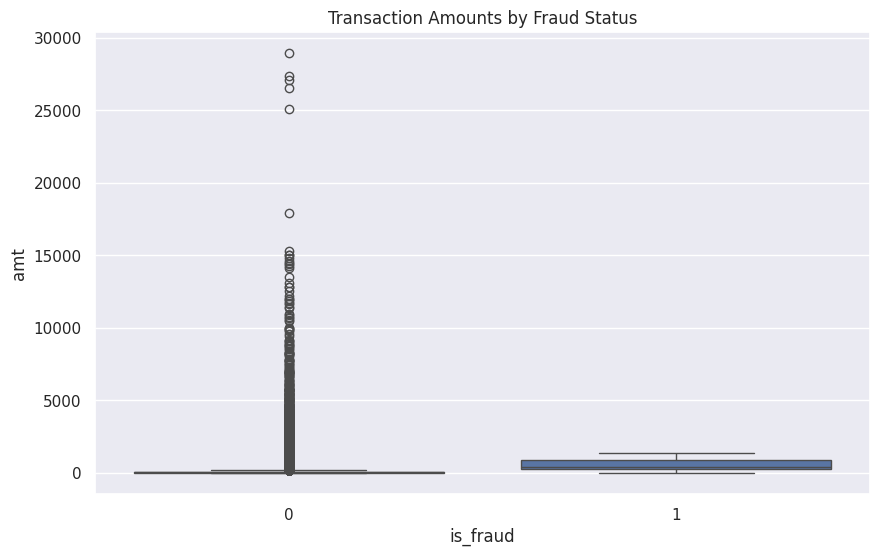

In [ ]:
# Boxplot of tranaction amounts by fraud status
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=fraudTrain_df)
plt.title('Transaction Amounts by Fraud Status')
plt.show()

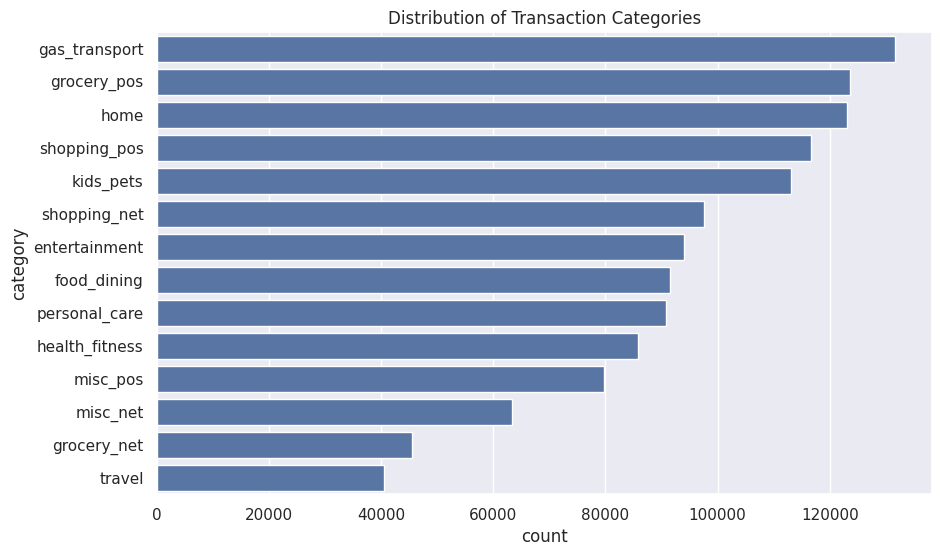

In [ ]:
# Distribution of transaction categories
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=fraudTrain_df, order=fraudTrain_df['category'].value_counts().index)
plt.title('Distribution of Transaction Categories')
plt.show()

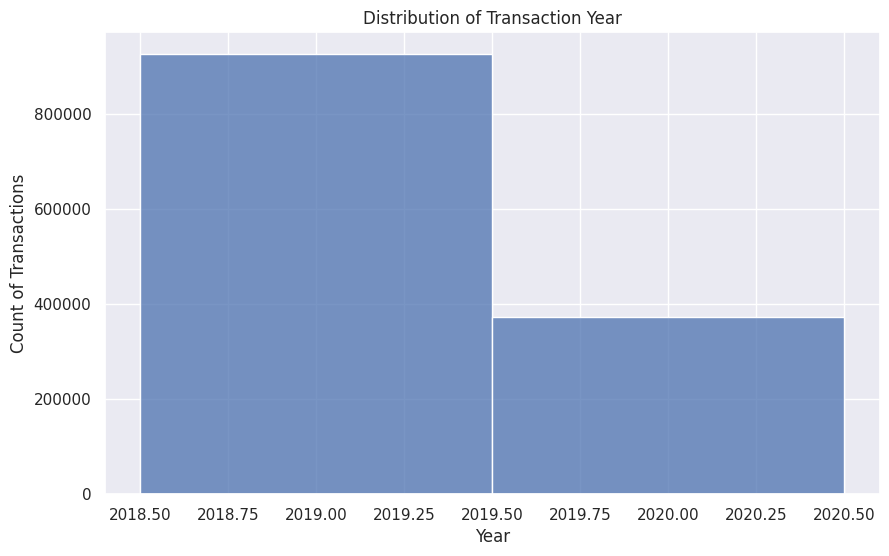

In [ ]:
# Plot the distribution of transaction years
plt.figure(figsize=(10, 6))
sns.histplot(fraudTrain_df['year'], bins=2, discrete=True)
plt.title('Distribution of Transaction Year')
plt.xlabel('Year')
plt.ylabel('Count of Transactions')
plt.show()

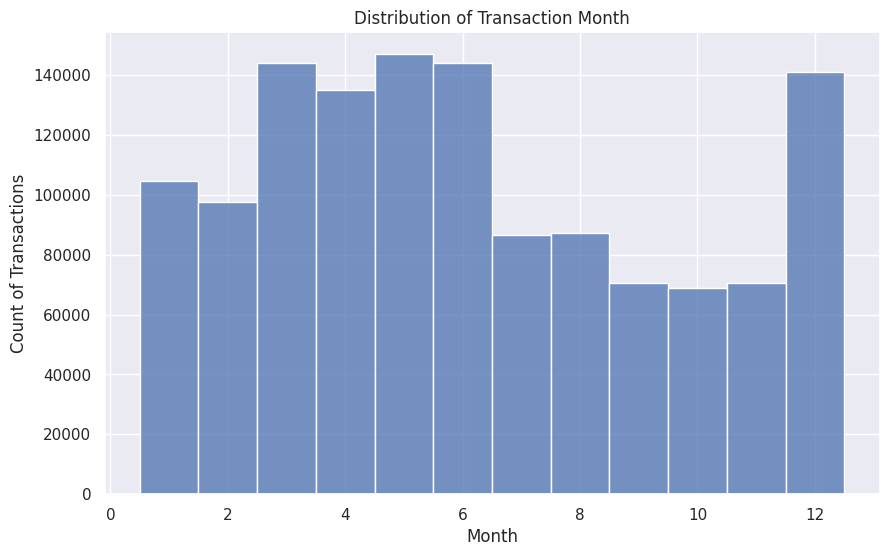

In [ ]:
# Distribution of transaction month
plt.figure(figsize=(10, 6))
sns.histplot(fraudTrain_df['month'], bins=12, discrete=True)
plt.title('Distribution of Transaction Month')
plt.xlabel('Month')
plt.ylabel('Count of Transactions')
plt.show()

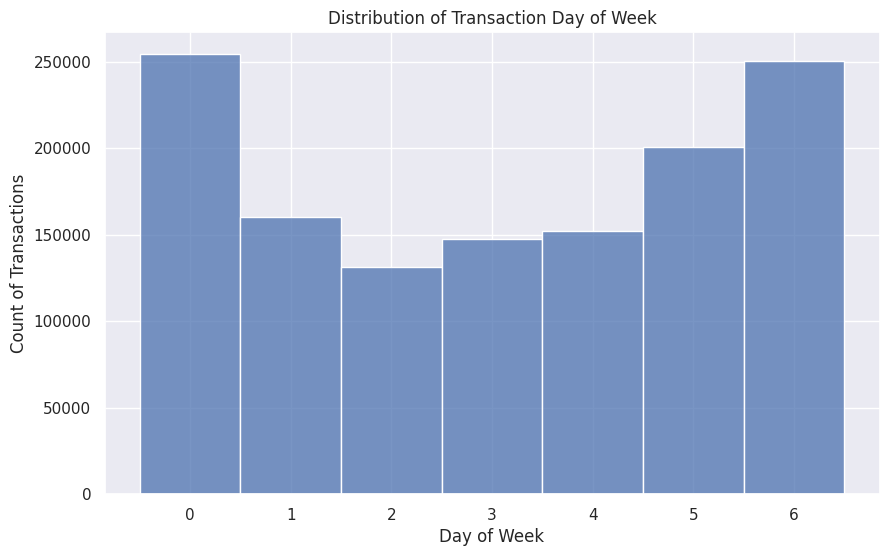

In [ ]:
# Distribution of transaction day of week
plt.figure(figsize=(10, 6))
sns.histplot(fraudTrain_df['day_of_week'], bins=7, discrete=True)
plt.title('Distribution of Transaction Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count of Transactions')
plt.show()

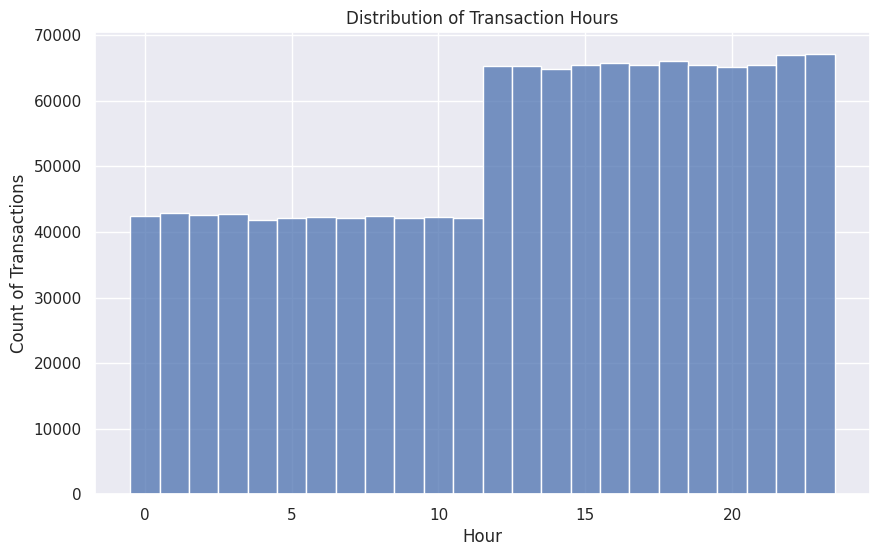

In [ ]:
# Distribution of transaction hours
plt.figure(figsize=(10, 6))
sns.histplot(fraudTrain_df['hour'], bins=24, discrete=True)
plt.title('Distribution of Transaction Hours')
plt.xlabel('Hour')
plt.ylabel('Count of Transactions')
plt.show()

### Bivariate Analysis

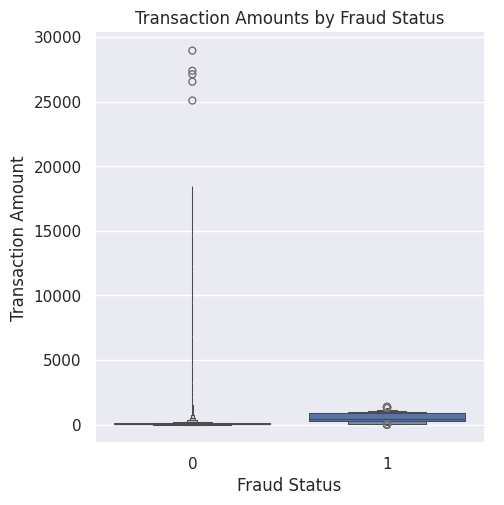

In [ ]:
# Relationship between transaction amount and fraud using catplot
sns.catplot(x='is_fraud', y='amt', kind='boxen', data=fraudTrain_df)
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Transaction Amount')
plt.show()

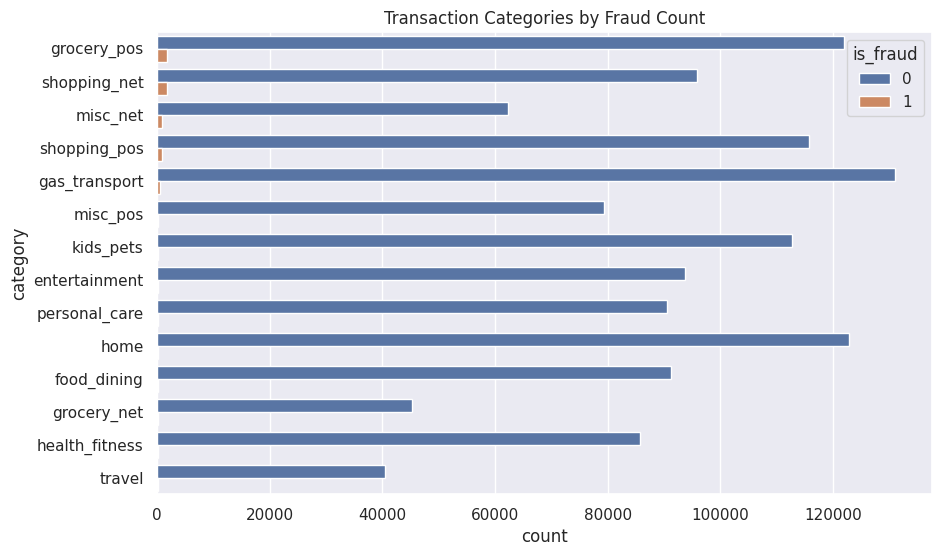

In [ ]:
# Calculate the number of fraudulent transactions per category
category_fraud_counts = fraudTrain_df[fraudTrain_df['is_fraud'] == 1]['category'].value_counts().index

# Filter the categories based on fraud count
plt.figure(figsize=(10, 6))
sns.countplot(y='category', hue='is_fraud', data=fraudTrain_df, order=category_fraud_counts)
plt.title('Transaction Categories by Fraud Count')
plt.show()

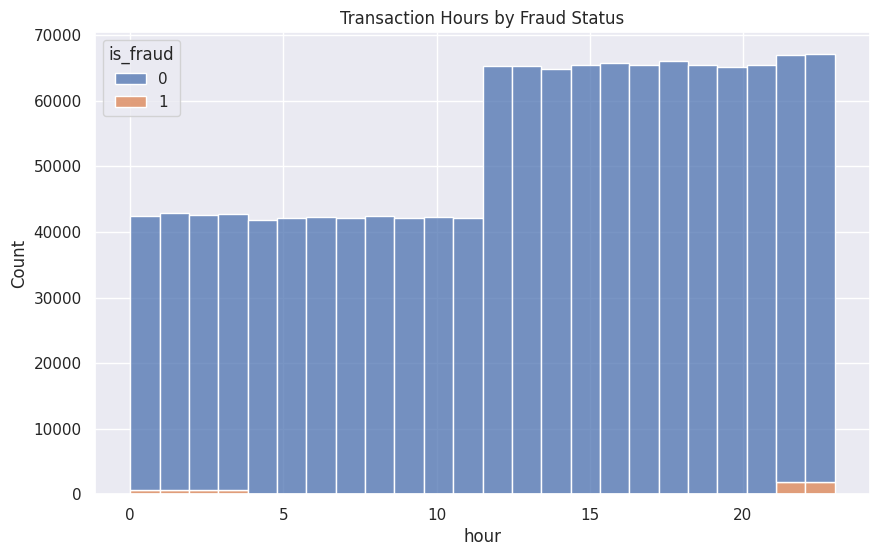

In [ ]:
# Relationship between transaction hour and fraud
plt.figure(figsize=(10, 6))
sns.histplot(data=fraudTrain_df, x='hour', hue='is_fraud', multiple='stack', bins=24)
plt.title('Transaction Hours by Fraud Status')
plt.show()

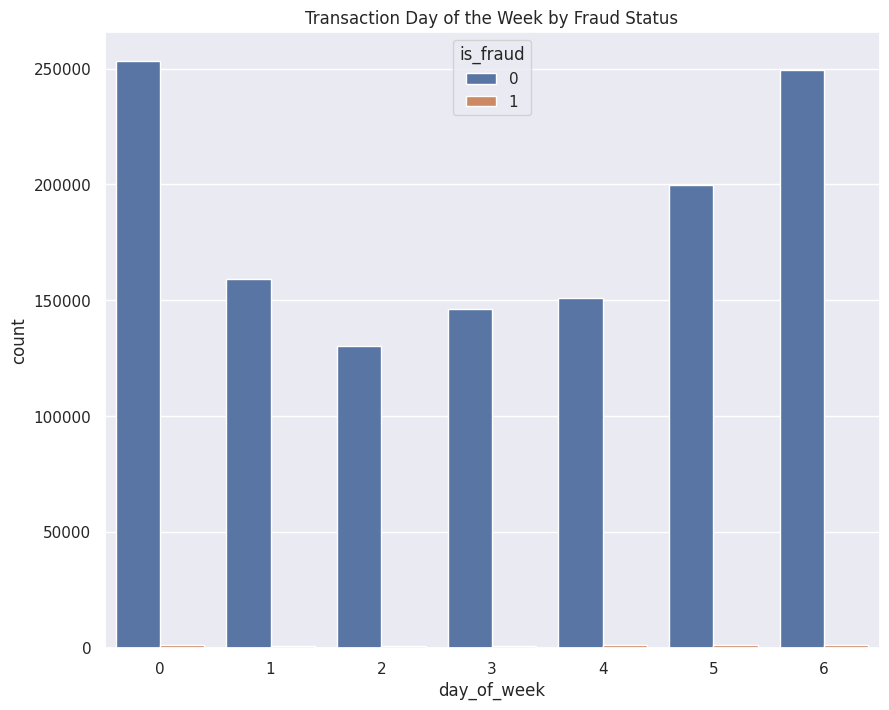

In [ ]:
# Relationship between transaction day of the week and fraud
plt.figure(figsize=(10, 8))
sns.countplot(data=fraudTrain_df, x='day_of_week', hue='is_fraud')#, multiple='stack', bins=7)
plt.title('Transaction Day of the Week by Fraud Status')
plt.show()

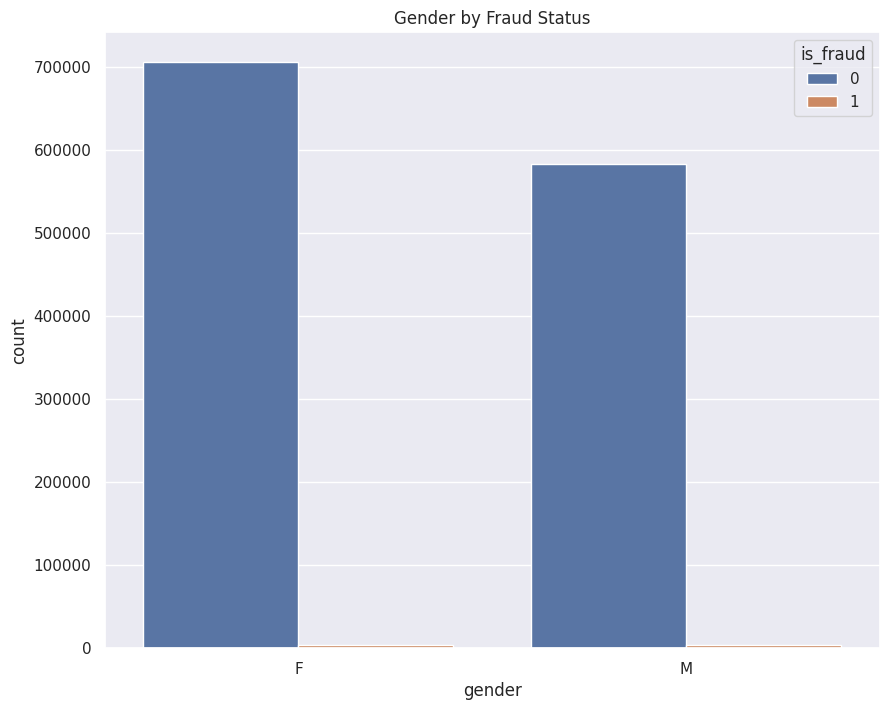

In [ ]:
# Relationship between gender and fraud
plt.figure(figsize=(10, 8))
sns.countplot(x='gender', hue='is_fraud', data=fraudTrain_df)
plt.title('Gender by Fraud Status')
plt.show()

### Relationship between City and Fraud (Top 20 cities by fraud count)

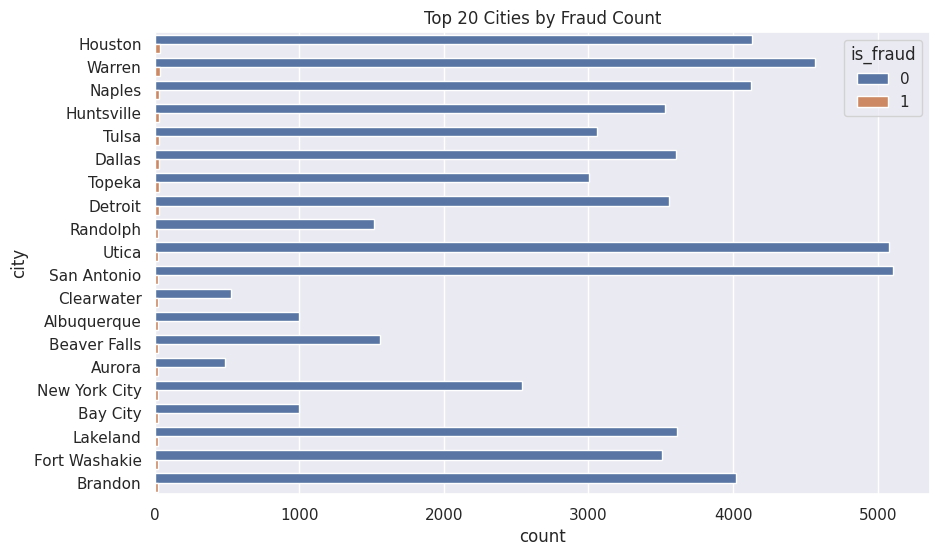

In [ ]:
# Calculate the number of fraudulent transactions per city
city_fraud_counts = fraudTrain_df[fraudTrain_df['is_fraud'] == 1]['city'].value_counts().nlargest(20)

# Filter the top cities based on fraud count
top_cities = city_fraud_counts.index
top_cities_df = fraudTrain_df[fraudTrain_df['city'].isin(top_cities)]

plt.figure(figsize=(10, 6))
sns.countplot(y='city', hue='is_fraud', data=top_cities_df, order=top_cities)
plt.title('Top 20 Cities by Fraud Count')
plt.show()

### Relationship between city population and fraud

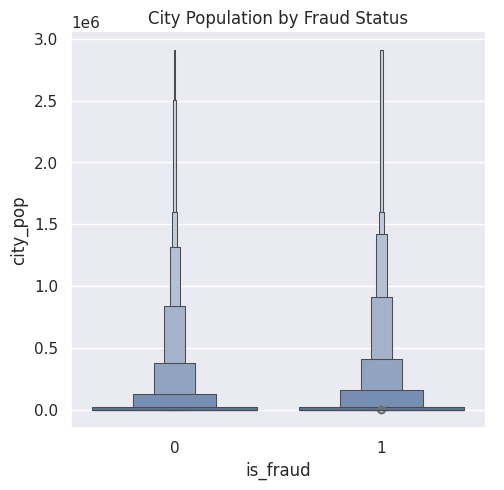

In [ ]:
# Relationship between city population and fraud
sns.catplot(x='is_fraud', y='city_pop', data=fraudTrain_df, kind="boxen")
plt.title('City Population by Fraud Status')
plt.show()

### Relationship between Job and Fraud (Top 20 jobs by fraud count)

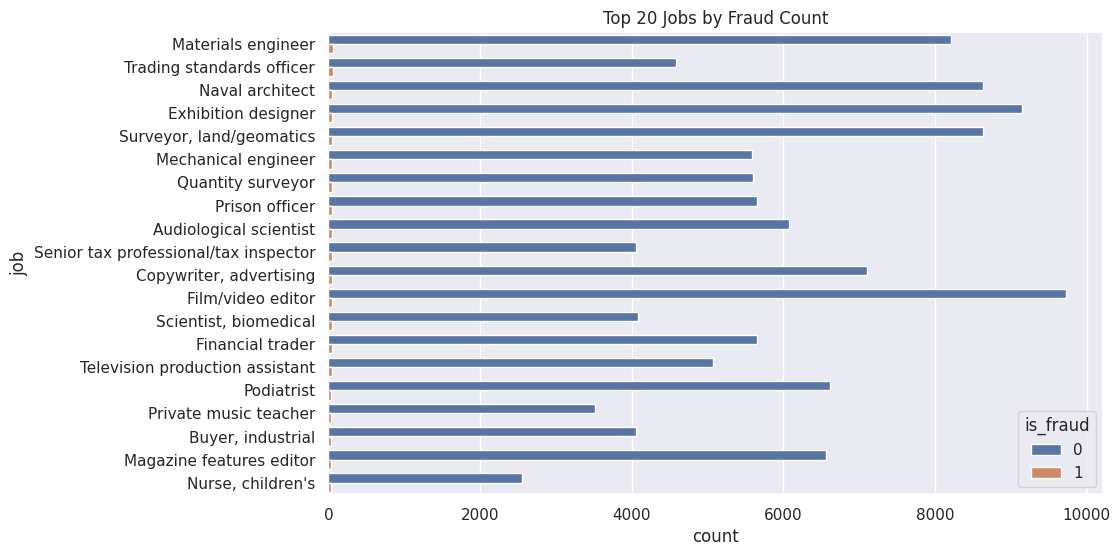

In [ ]:
# Calculate the number of fraudulent transactions per job
job_fraud_counts = fraudTrain_df[fraudTrain_df['is_fraud'] == 1]['job'].value_counts().nlargest(20)

# Filter the top jobs based on fraud count
top_jobs = job_fraud_counts.index
top_jobs_df = fraudTrain_df[fraudTrain_df['job'].isin(top_jobs)]

plt.figure(figsize=(10, 6))
sns.countplot(y='job', hue='is_fraud', data=top_jobs_df, order=top_jobs)
plt.title('Top 20 Jobs by Fraud Count')
plt.show()

### Relationship between Merchant and Fraud (Top 20 merchants by fraud count)

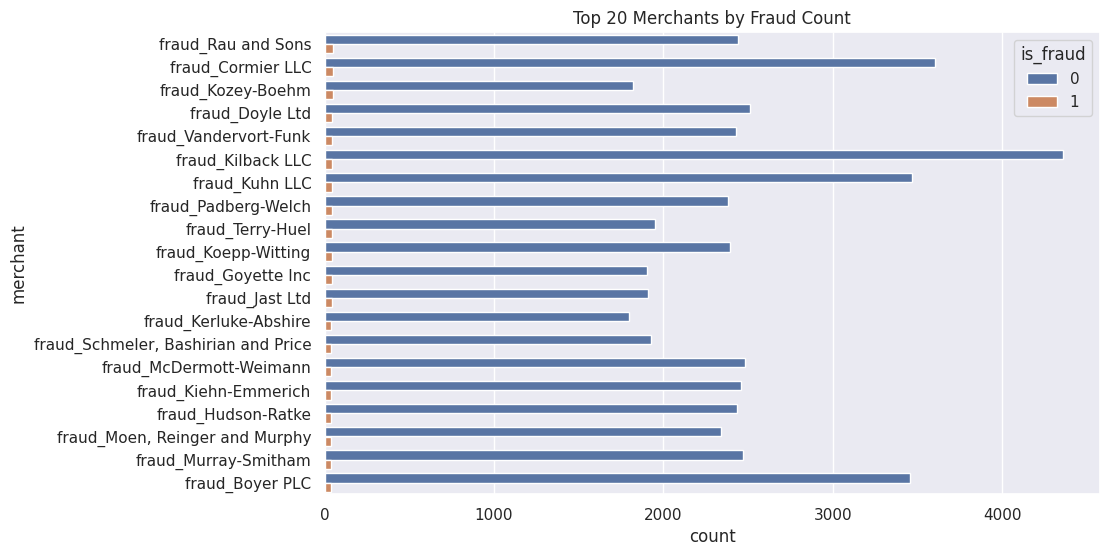

In [ ]:
# Calculate the number of fraudulent transactions per merchant
merchant_fraud_counts = fraudTrain_df[fraudTrain_df['is_fraud'] == 1]['merchant'].value_counts().nlargest(20)

# Filter the top merchants based on fraud count
top_merchants = merchant_fraud_counts.index
top_merchants_df = fraudTrain_df[fraudTrain_df['merchant'].isin(top_merchants)]

plt.figure(figsize=(10, 6))
sns.countplot(y='merchant', hue='is_fraud', data=top_merchants_df, order=top_merchants)
plt.title('Top 20 Merchants by Fraud Count')
plt.show()

### Multivariate Analysis

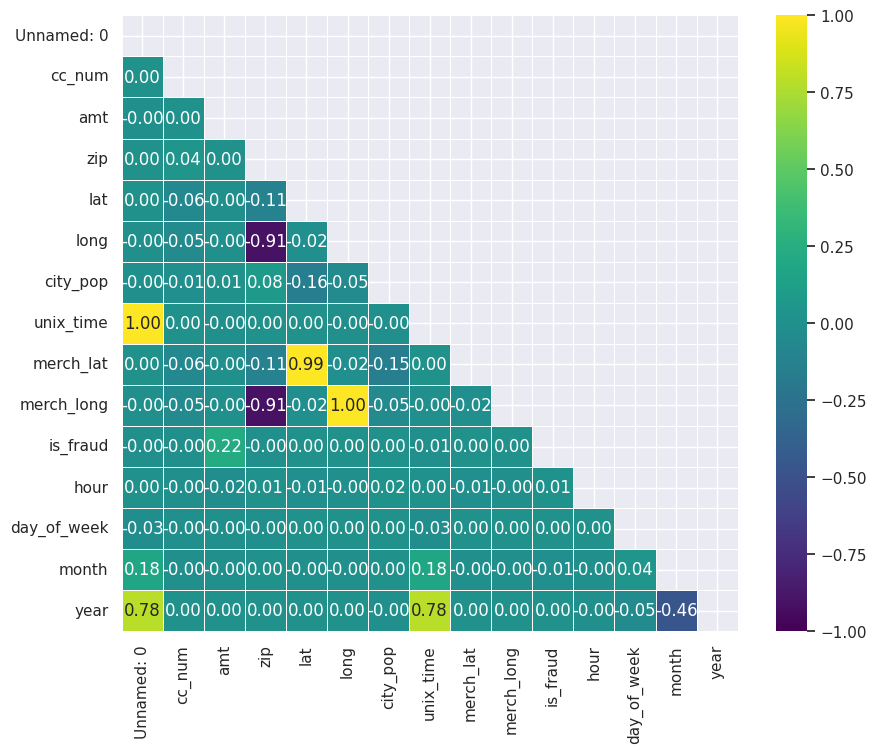

In [ ]:
# Select only numerical columns
numerical_columns = fraudTrain_df.select_dtypes(include=['number']).columns
correlation_matrix = fraudTrain_df[numerical_columns].corr()

# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a masked heatmap
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.show()

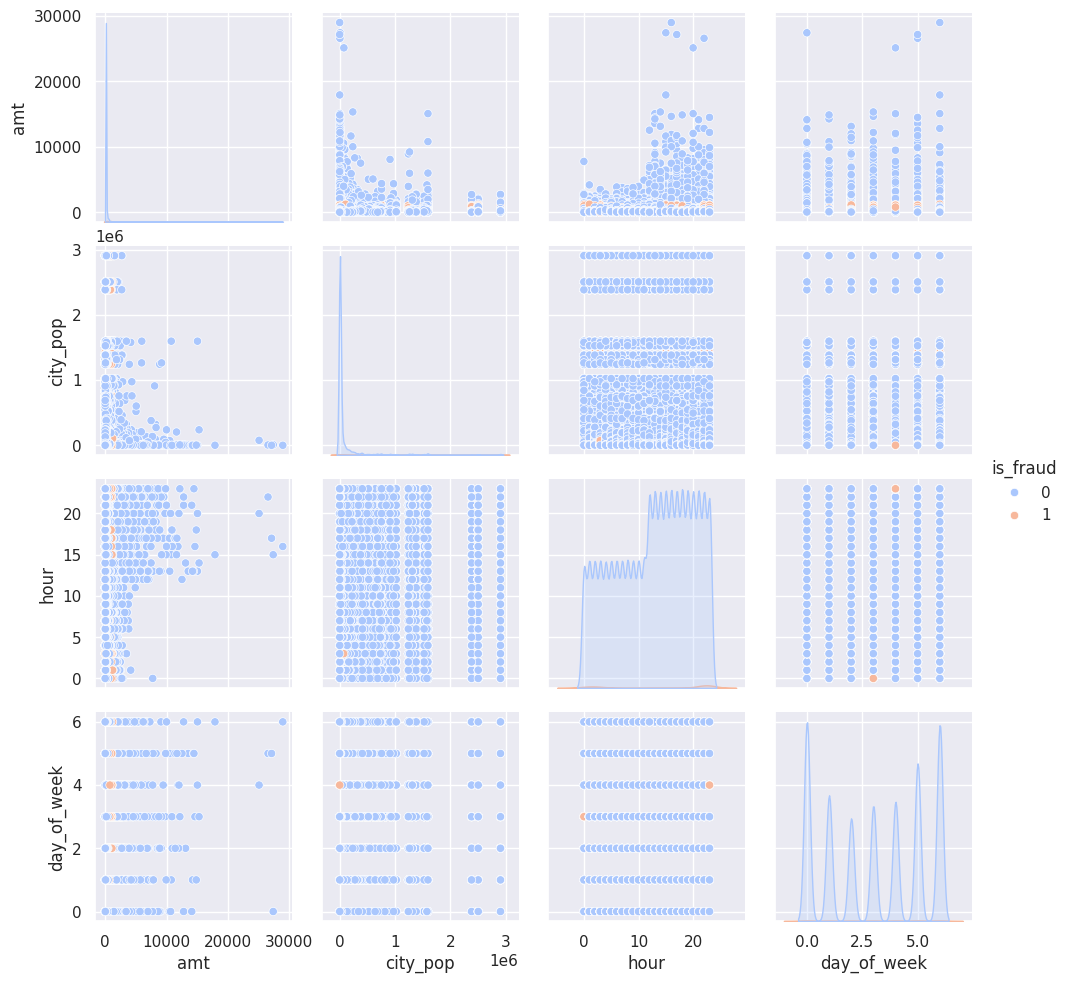

In [ ]:
# Pair plot of selected features
selected_features = ['amt', 'city_pop', 'category', 'hour', 'city', 'merchant', 'day_of_week', 'is_fraud']
sns.pairplot(fraudTrain_df[selected_features], hue='is_fraud', palette='coolwarm')
plt.show()

## Data Preparation and One-Hot Encoding

In [ ]:
fraudTest_df = pd.read_csv('/content/fraud-detection/fraudTest.csv')
fraudTest_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
# Ensure the transaction date column is in datetime format
fraudTest_df['trans_date_trans_time'] = pd.to_datetime(fraudTest_df['trans_date_trans_time'])

# Extract additional features from the transaction date
fraudTest_df['hour'] = fraudTest_df['trans_date_trans_time'].dt.hour
fraudTest_df['day_of_week'] = fraudTest_df['trans_date_trans_time'].dt.dayofweek
fraudTest_df['month'] = fraudTest_df['trans_date_trans_time'].dt.month
fraudTest_df['year'] = fraudTest_df['trans_date_trans_time'].dt.year

In [ ]:
# Select relevant columns
columns_to_keep = ['amt', 'gender', 'category', 'merchant', 'lat', 'long', 'city', 'city_pop', 'job', 'dob', 'hour', 'day_of_week', 'month', 'year', 'is_fraud']
fraudTrain_df = fraudTrain_df[columns_to_keep]
fraudTest_df = fraudTest_df[columns_to_keep]

In [ ]:
# One-Hot Encode Categorical Variables
categorical_cols = ['gender', 'category', 'merchant', 'city', 'dob', 'job']
fraudTrain_df = pd.get_dummies(fraudTrain_df, columns=categorical_cols, drop_first=True)
fraudTest_df = pd.get_dummies(fraudTest_df, columns=categorical_cols, drop_first=True)

# Align the test set columns with the training set
fraudTest_df = fraudTest_df.reindex(columns=fraudTrain_df.columns, fill_value=0)

In [ ]:
# Separate features and target variable for training and test sets
X_train = fraudTrain_df.drop(columns=['is_fraud'])
y_train = fraudTrain_df['is_fraud']

In [ ]:
X_test = fraudTest_df.drop(columns=['is_fraud'])
y_test = fraudTest_df['is_fraud']

In [ ]:
# Scale Numerical Features
scaler = StandardScaler()
numerical_cols = ['amt', 'lat', 'long', 'city_pop', 'hour', 'day_of_week', 'month', 'year']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
# Perform SMOTE to balance the target variable
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Check the resampled data distribution
print(f"Original dataset shape: {y_train.value_counts()}")
print(f"Resampled dataset shape: {y_train_resampled.value_counts()}")

Original dataset shape: is_fraud
0    1289169
1       7506
Name: count, dtype: int64
Resampled dataset shape: is_fraud
0    1289169
1    1289169
Name: count, dtype: int64


In [ ]:
# Save the resampled datasets and test sets
joblib.dump((X_train_resampled, y_train_resampled, X_test, y_test), 'smote_resampled_data_and_test_data.joblib')

['smote_resampled_data_and_test_data.joblib']

## Model Training and Evaluation

In [ ]:
# Load the resampled datasets and test sets
X_train_resampled, y_train_resampled, X_test, y_test = joblib.load('smote_resampled_data_and_test_data.joblib')

In [ ]:
# Use a smaller subset of the data for testing
X_train_resampled, y_train_resampled = shuffle(X_train_resampled, y_train_resampled, random_state=42)
X_train_resampled = X_train_resampled[:100000]
y_train_resampled = y_train_resampled[:100000]

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, n_jobs=-1),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
}

In [ ]:
def train_and_evaluate(model_name, model, X_train, y_train, X_test, y_test):
    print(f'Training {model_name}...')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    return model_name, report, matrix

# Use parallel processing to train and evaluate models
results = Parallel(n_jobs=-1)(
    delayed(train_and_evaluate)(model_name, model, X_train_resampled, y_train_resampled, X_test, y_test)
    for model_name, model in models.items()
)

# Print results
for model_name, report, matrix in results:
    print(f'\n{model_name} Classification Report:')
    print(report)
    print(f'\n{model_name} Confusion Matrix:')
    print(matrix)
    print('-' * 50)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.12      0.16      0.14      2145

    accuracy                           0.99    555719
   macro avg       0.56      0.58      0.57    555719
weighted avg       0.99      0.99      0.99    555719


Logistic Regression Confusion Matrix:
[[550961   2613]
 [  1792    353]]
--------------------------------------------------

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.19      0.89      0.31      2145

    accuracy                           0.98    555719
   macro avg       0.59      0.94      0.65    555719
weighted avg       1.00      0.98      0.99    555719


Decision Tree Confusion Matrix:
[[545389   8185]
 [   241   1904]]
--------------------------------------------------

Random Forest Class

## Result Interpretation

- Logistic Regression is very accurate for classifying the majority class (0) but performs poorly for the minority class (1), as indicated by low precision and recall for class 1.
- The Decision Tree model is more balanced in terms of recall, correctly identifying a high percentage of the minority class (1). However, its precision for class 1 is low, leading to many false positives. This indicates overfitting to the minority class during training.
- Random Forest performs well for both classes with a good balance of precision and recall for the minority class (1). It reduces the number of false negatives compared to Logistic Regression, indicating it is better at identifying fraudulent transactions.
- Gradient Boosting has a very high recall for the minority class (1), meaning it identifies most fraudulent transactions. However, its precision is low, leading to many false positives. This trade-off might be acceptable depending on the context and the cost of false positives.
- XGBoost shows a good balance between precision and recall for the minority class (1), with fewer false negatives than the other models except for Gradient Boosting. It provides a good trade-off between identifying frauds and minimizing false positives.

**Random Forest** and **XGBoost** are the most balanced models, offering good precision and recall for the minority class. Depending on the business context and the cost of false positives, one of these models might be preferable. If the priority is to identify as many fraudulent transactions as possible, Gradient Boosting might be considered despite its higher false positive rate.